In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
import requests
requests.__version__

'2.24.0'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b02c17c8a755f4cb5e5080799e5bd79c


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maku
Processing Record 2 of Set 1 | tabukiniberu
City not found. Skipping...
Processing Record 3 of Set 1 | haines junction
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | novikovo
Processing Record 10 of Set 1 | hastings
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 15 of Set 1 | brunico
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | a

Processing Record 37 of Set 4 | macusani
Processing Record 38 of Set 4 | siverek
Processing Record 39 of Set 4 | hauterive
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | inuvik
Processing Record 42 of Set 4 | samusu
City not found. Skipping...
Processing Record 43 of Set 4 | bahia blanca
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | sibolga
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | agirish
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | cabesti
Processing Record 50 of Set 4 | rawson
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | hovd
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | shkotovo-26
City not found. Skipping...
Processing Record 6 of Set 5 | kolpashevo
Processing Record 7 of Set 5 | pangkalanbuun
Processing Record 8 of Set 5 | labuhan
Processing Record 9 of Se

Processing Record 23 of Set 8 | eureka
Processing Record 24 of Set 8 | aleksandrovskoye
Processing Record 25 of Set 8 | shenkursk
Processing Record 26 of Set 8 | kirillov
Processing Record 27 of Set 8 | umm lajj
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | zhezkazgan
Processing Record 30 of Set 8 | morehead
Processing Record 31 of Set 8 | kearney
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | ofunato
Processing Record 35 of Set 8 | banjar
Processing Record 36 of Set 8 | omsukchan
Processing Record 37 of Set 8 | show low
Processing Record 38 of Set 8 | hambantota
Processing Record 39 of Set 8 | tombouctou
Processing Record 40 of Set 8 | shellbrook
Processing Record 41 of Set 8 | san ramon
Processing Record 42 of Set 8 | meyungs
City not found. Skipping...
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | atherton
Processing Record 45 of Set 8 | leningradskiy
Pro

Processing Record 15 of Set 12 | bairiki
Processing Record 16 of Set 12 | gornopravdinsk
Processing Record 17 of Set 12 | jinka
Processing Record 18 of Set 12 | villazon
Processing Record 19 of Set 12 | salmas
Processing Record 20 of Set 12 | birpur
Processing Record 21 of Set 12 | sataua
City not found. Skipping...
Processing Record 22 of Set 12 | porbandar
Processing Record 23 of Set 12 | santa cruz de la palma
Processing Record 24 of Set 12 | shingu
Processing Record 25 of Set 12 | sabha
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | ajdabiya
Processing Record 28 of Set 12 | port hedland
Processing Record 29 of Set 12 | satitoa
City not found. Skipping...
Processing Record 30 of Set 12 | santa marta
Processing Record 31 of Set 12 | ostersund
Processing Record 32 of Set 12 | pyaozerskiy
Processing Record 33 of Set 12 | slave lake
Processing Record 34 of Set 12 | abashiri
Processing Record 35 of Set 12 | oparino
Processing Record 36 of Set 12 | flinders
Proces

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maku,39.29,44.45,53.13,39,16,3.36,IR,2020-10-29 03:15:44
1,Haines Junction,60.75,-137.51,28.40,79,99,2.13,CA,2020-10-29 03:15:45
2,Khatanga,71.97,102.50,-0.08,87,0,9.17,RU,2020-10-29 03:15:45
3,Vaini,-21.20,-175.20,77.00,73,40,14.99,TO,2020-10-29 03:15:45
4,Tiksi,71.69,128.87,1.08,90,97,14.63,RU,2020-10-29 03:15:45
5,Ushuaia,-54.80,-68.30,41.00,93,90,23.04,AR,2020-10-29 03:15:45
6,Walvis Bay,-22.96,14.51,57.00,93,33,8.05,NA,2020-10-29 03:15:45
7,Novikovo,51.15,37.89,38.05,75,0,8.12,RU,2020-10-29 03:15:45
8,Hastings,50.86,0.57,52.00,73,74,4.00,GB,2020-10-29 03:14:35
9,Port Elizabeth,-33.92,25.57,62.60,88,20,6.93,ZA,2020-10-29 03:15:46


In [28]:
#reordering dataframe 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maku,IR,2020-10-29 03:15:44,39.29,44.45,53.13,39,16,3.36
1,Haines Junction,CA,2020-10-29 03:15:45,60.75,-137.51,28.40,79,99,2.13
2,Khatanga,RU,2020-10-29 03:15:45,71.97,102.50,-0.08,87,0,9.17
3,Vaini,TO,2020-10-29 03:15:45,-21.20,-175.20,77.00,73,40,14.99
4,Tiksi,RU,2020-10-29 03:15:45,71.69,128.87,1.08,90,97,14.63
5,Ushuaia,AR,2020-10-29 03:15:45,-54.80,-68.30,41.00,93,90,23.04
6,Walvis Bay,NA,2020-10-29 03:15:45,-22.96,14.51,57.00,93,33,8.05
7,Novikovo,RU,2020-10-29 03:15:45,51.15,37.89,38.05,75,0,8.12
8,Hastings,GB,2020-10-29 03:14:35,50.86,0.57,52.00,73,74,4.00
9,Port Elizabeth,ZA,2020-10-29 03:15:46,-33.92,25.57,62.60,88,20,6.93


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603944039.6317668

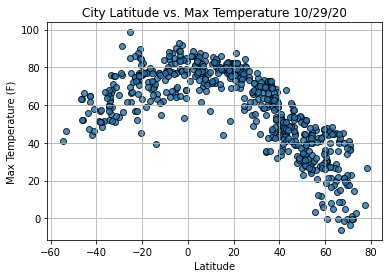

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

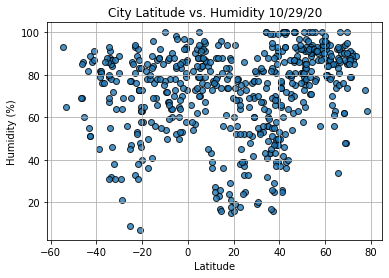

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

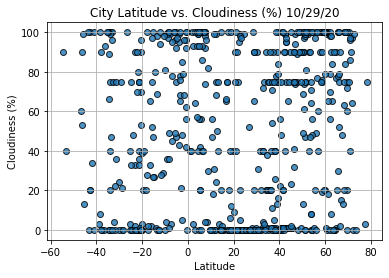

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

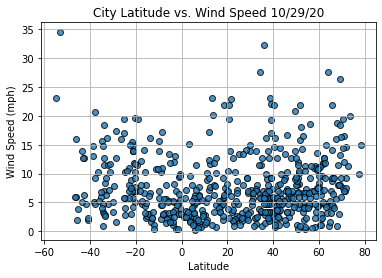

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()